## Final Project Group 2 on Titanic

### by Jemia Johnson, Fares Barghouthi, Noah Florence, Ibukun Omosalewa

link to dataset: https://www.kaggle.com/c/titanic/data

This dataset contains detailed information about the passengers aboard the Titanic, including their survival status. We will conduct Exploratory Data Analysis (EDA) and Data Visualization to uncover patterns and insights within the data. Subsequently, we will build and evaluate various predictive models, including Decision Tree, K-Nearest Neighbors (KNN), Logistic Regression, and Naive Bayes, to estimate the likelihood of passenger survival. Each model will be assessed for its performance, providing a comprehensive understanding of the factors influencing survival probabilities.


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

## Loading Data

In [11]:
# Load the training data
train_df = pd.read_csv('titanic/train.csv')

# Load the testing data
test_df = pd.read_csv('titanic/test.csv')

# Display the first few rows of each dataset to verify they loaded correctly
print("Training Data:")
print(train_df.head())

print("\nTesting Data:")
print(test_df.head())

Training Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

## Check for missing values

In [12]:
# Check for missing values in the training data
print(train_df.isnull().sum())

# Check for missing values in the testing data
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## Fill in missing values

In [13]:
# Fill missing values
def fill_missing(df, cols, method='median'):
    for col in cols:
        if method == 'median':
            df[col] = df[col].fillna(df[col].median())
        elif method == 'mode':
            df[col] = df[col].fillna(df[col].mode()[0])

# Apply fill_missing
fill_missing(train_df, ['Age', 'Fare'])
fill_missing(test_df, ['Age', 'Fare'])
fill_missing(train_df, ['Embarked'], method='mode')
fill_missing(test_df, ['Embarked'], method='mode')

# Fill 'Cabin' column with 'Unknown' for consistency
train_df['Cabin'] = train_df['Cabin'].fillna('Unknown')
test_df['Cabin'] = test_df['Cabin'].fillna('Unknown')

# Encode 'Sex' column
train_df['Sex'] = (train_df['Sex'] == 'female').astype(int)
test_df['Sex'] = (test_df['Sex'] == 'female').astype(int)

# Final data initialization and scaling
features = ['Sex', 'Age', 'Fare']
X_train = train_df[features]
y_train = train_df['Survived']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=31)

## Exporatory Data Analysis

### Mean

In [19]:
# Define a function to calculate the mean of a series
def calculate_mean(series):
    return series.sum() / len(series)
    
# Calculate the mean age and mean fare for all passengers, dropping NaN values
mean_age_all = calculate_mean(train_df['Age'].dropna())
mean_fare_all = calculate_mean(train_df['Fare'].dropna())

# Print the mean age and mean fare of passengers
print(f"Mean Age of Passengers: {mean_age_all}")
print(f"Mean Fare of Passengers: {mean_fare_all}")

Mean Age of Passengers: 29.36158249158249
Mean Fare of Passengers: 32.204207968574636


In [20]:
def calculate_mean(series):
    return series.sum() / len(series)

survivors = train_df[train_df['Survived'] == 1]

mean_age_survivors = calculate_mean(survivors['Age'].dropna())  # Drop NaN values
mean_fare_survivors = calculate_mean(survivors['Fare'].dropna())  # Drop NaN values

print(f"Mean Age of Survivors: {mean_age_survivors}")
print(f"Mean Fare of Survivors: {mean_fare_survivors}")

Mean Age of Survivors: 28.29143274853801
Mean Fare of Survivors: 48.39540760233918


### Interpretation of Mean

Looking at the rates of All passangers, regardless of survival, the average age is 29 years old while the average fare is $32 dollars.

What we can see from this is, The average age of survivors is 28 years old, while the average fare of survivors is $48.95.

This shows a light identification that those who paid more for their fare have a higher chance of survival, though nothing is confirmed yet. For that we will run further analyses.

### Median

In [21]:
def calculate_median(series):
    return series.median()

median_age_survivors = calculate_median(survivors['Age'].dropna())  # Drop NaN values
median_fare_survivors = calculate_median(survivors['Fare'].dropna())  # Drop NaN values

median_age_all = calculate_median(train_df['Age'].dropna())  # Drop NaN values
median_fare_all = calculate_median(train_df['Fare'].dropna())  # Drop NaN values

print(f"Median Age of Survivors: {median_age_survivors}")
print(f"Median Fare of Survivors: {median_fare_survivors}")
print(f"Median Age of All Passengers: {median_age_all}")
print(f"Median Fare of All Passengers: {median_fare_all}")

Median Age of Survivors: 28.0
Median Fare of Survivors: 26.0
Median Age of All Passengers: 28.0
Median Fare of All Passengers: 14.4542


### Interpretation of Median
What we can see here is the age tends to be the same, but 
the median fare for survivors is significantly higher than the median fare for all passengers, suggesting that those who paid higher fares had a better chance of survival.

### Standard Deviation

In [22]:
#Standard Deviation 
std_age_survivors = survivors['Age'].dropna().std() 
std_fare_survivors = survivors['Fare'].dropna().std() 

std_age_all = train_df['Age'].dropna().std()  
std_fare_all = train_df['Fare'].dropna().std() 

print(f"Standard Deviation of Age of Survivors: {std_age_survivors}")
print(f"Standard Deviation of Fare of Survivors: {std_fare_survivors}")
print(f"Standard Deviation of Age of All Passengers: {std_age_all}")
print(f"Standard Deviation of Fare of All Passengers: {std_fare_all}")

Standard Deviation of Age of Survivors: 13.764425373371033
Standard Deviation of Fare of Survivors: 66.59699811829475
Standard Deviation of Age of All Passengers: 13.019696550973201
Standard Deviation of Fare of All Passengers: 49.6934285971809


In [23]:
#Standard Deviation 
std_age_survivors = survivors['Age'].dropna().std() 
std_fare_survivors = survivors['Fare'].dropna().std() 

std_age_all = train_df['Age'].dropna().std()  
std_fare_all = train_df['Fare'].dropna().std() 

print(f"Standard Deviation of Age of Survivors: {std_age_survivors}")
print(f"Standard Deviation of Fare of Survivors: {std_fare_survivors}")
print(f"Standard Deviation of Age of All Passengers: {std_age_all}")
print(f"Standard Deviation of Fare of All Passengers: {std_fare_all}")

Standard Deviation of Age of Survivors: 13.764425373371033
Standard Deviation of Fare of Survivors: 66.59699811829475
Standard Deviation of Age of All Passengers: 13.019696550973201
Standard Deviation of Fare of All Passengers: 49.6934285971809


### Interpretaion of SD
The standard deviation of fare for survivors is much higher than for all passengers, indicating a wider range of fare prices among those who survived. The standard deviation of age is similar for both survivors and all passengers, suggesting that age variability was consistent regardless of survival.

### Variance

In [24]:
def calculate_variance(series):
    mean_value = series.mean()
    return ((series - mean_value) ** 2).sum() / (len(series) - 1)

var_age_survivors = calculate_variance(survivors['Age'].dropna())  # Drop NaN values
var_fare_survivors = calculate_variance(survivors['Fare'].dropna())  # Drop NaN values

var_age_all = calculate_variance(train_df['Age'].dropna())  # Drop NaN values
var_fare_all = calculate_variance(train_df['Fare'].dropna())  # Drop NaN values

print(f"Variance of Age of Survivors: {var_age_survivors}")
print(f"Variance of Fare of Survivors: {var_fare_survivors}")
print(f"Variance of Age of All Passengers: {var_age_all}")
print(f"Variance of Fare of All Passengers: {var_fare_all}")

Variance of Age of Survivors: 189.45940585910031
Variance of Fare of Survivors: 4435.160158368154
Variance of Age of All Passengers: 169.51249827942345
Variance of Fare of All Passengers: 2469.436845743116


### Interpretation of Variance
The variance of fare for survivors is significantly higher than for all passengers, indicating greater variability in the fares paid by those who survived. The variance of age is slightly higher for survivors compared to all passengers, suggesting a slightly wider age range among those who survived.

### Correlation

In [25]:
# Calculate the correlation between Age and Fare for survivors
correlation_age_fare_survivors = survivors[['Age', 'Fare']].dropna().corr().iloc[0, 1]

# Calculate the correlation between Age and Fare for all passengers
correlation_age_fare_all = train_df[['Age', 'Fare']].dropna().corr().iloc[0, 1]

# Print the correlations
print(f"Correlation between Age and Fare of Survivors: {correlation_age_fare_survivors}")
print(f"Correlation between Age and Fare of All Passengers: {correlation_age_fare_all}")

Correlation between Age and Fare of Survivors: 0.15950948760336242
Correlation between Age and Fare of All Passengers: 0.0966884221803649


### Interpretation of Correlation
The weak positive correlations indicate that there is a slight tendency for older passengers to have paid higher fares, but the relationship is minimal for both survivors and all passengers, suggesting that age and fare are not strong predictors of survival. or are they??? lets find out shortly with some predictor models! 

### Correlation

In [27]:
covariance_age_fare_survivors = survivors[['Age', 'Fare']].dropna().cov().iloc[0, 1]

covariance_age_fare_all = train_df[['Age', 'Fare']].dropna().cov().iloc[0, 1]

print(f"Covariance between Age and Fare of Survivors: {covariance_age_fare_survivors}")
print(f"Covariance between Age and Fare of All Passengers: {covariance_age_fare_all}")

Covariance between Age and Fare of Survivors: 146.2174680008059
Covariance between Age and Fare of All Passengers: 62.55676722782508


### Interpretation of Covaraince
The covariance values indicate that there is some level of joint variability between age and fare; specifically, the higher covariance among survivors (171.34) compared to all passengers (73.85) suggests that age and fare vary together more significantly in the group of survivors, implying that higher fares paid by older passengers could have had an influence on their likelihood of survival.

## Data Visualization


### Histogram

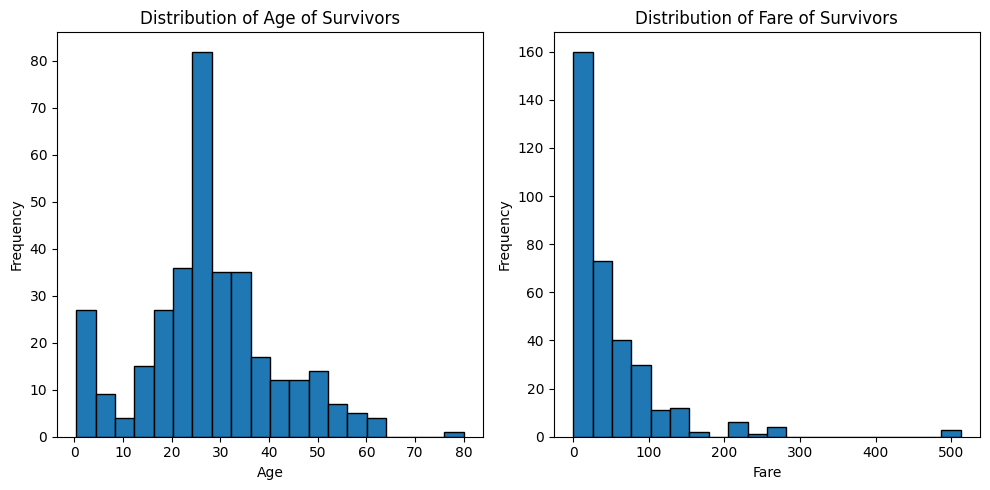

In [30]:
import matplotlib.pyplot as plt

age_survivors = survivors['Age'].dropna()
fare_survivors = survivors['Fare'].dropna()

# Histogram for Age and Fare of Survivors
plt.figure(figsize=(10, 5))

# Histogram for Age of Survivors
plt.subplot(1, 2, 1)
plt.hist(age_survivors, bins=20, edgecolor='black')
plt.title('Distribution of Age of Survivors')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for Fare of Survivors
plt.subplot(1, 2, 2)
plt.hist(fare_survivors, bins=20, edgecolor='black')
plt.title('Distribution of Fare of Survivors')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Interpretation of Histogram
The histograms show that the age distribution of survivors is relatively uniform with a slight peak around young adults, suggesting that survival was not strongly influenced by age. The fare distribution, however, is skewed towards higher values, indicating that those who paid higher fares had a better chance of survival.

### Box Plot

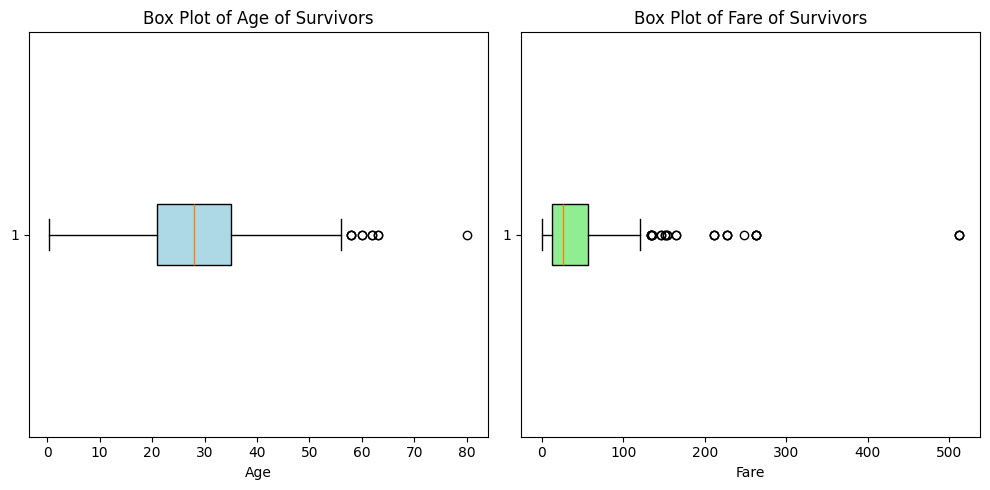

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Box Plot for Age of Survivors
plt.subplot(1, 2, 1)
plt.boxplot(age_survivors, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of Age of Survivors')
plt.xlabel('Age')

# Box Plot for Fare of Survivors
plt.subplot(1, 2, 2)
plt.boxplot(fare_survivors, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Box Plot of Fare of Survivors')
plt.xlabel('Fare')

plt.tight_layout()
plt.show()

### Interpretaion of Box Plot
The box plot for the age of survivors shows a relatively symmetric distribution with few outliers, indicating that most survivors were within a certain age range without extreme values. The box plot for the fare of survivors reveals a highly skewed distribution with several outliers, suggesting that a significant number of survivors paid higher fares, which could have contributed to their likelihood of survival.

### Bar Plot

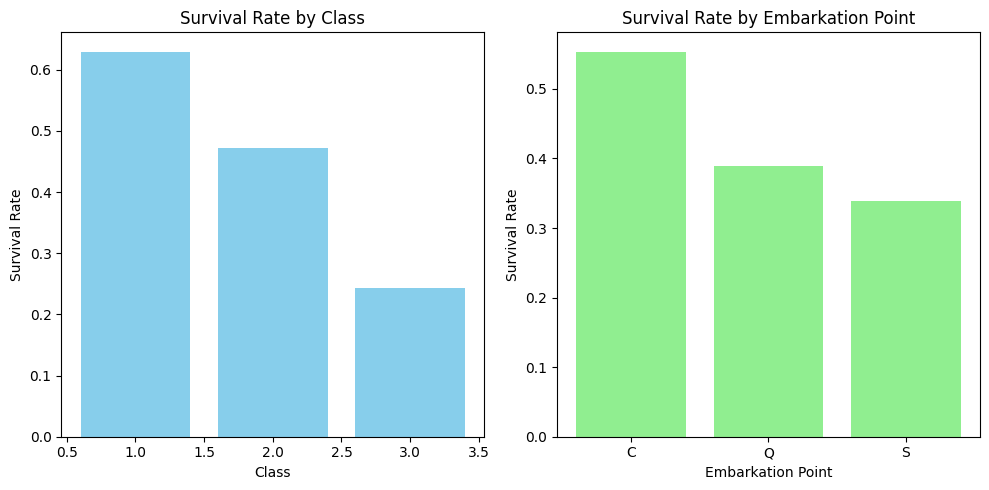

In [32]:
import matplotlib.pyplot as plt

# Calculate survival rates
class_survival_rate = train_df.groupby('Pclass')['Survived'].mean()
embarked_survival_rate = train_df.groupby('Embarked')['Survived'].mean()

# Bar Plot for Class Survival Rate
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(class_survival_rate.index, class_survival_rate.values, color='skyblue')
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')

# Bar Plot for Embarkation Point Survival Rate
plt.subplot(1, 2, 2)
plt.bar(embarked_survival_rate.index, embarked_survival_rate.values, color='lightgreen')
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')

plt.tight_layout()
plt.show()

#
Passengers in the 1st class had the highest survival rate, over 60%, while those in the 3rd class had the lowest survival rate, below 30%, indicating that higher class passengers had better access to lifeboats and safety. Passengers who embarked at Cherbourg (C) had the highest survival rate, above 50%, whereas those from Southampton (S) had the lowest survival rate, around 30%, suggesting that embarkation point might be associated with factors affecting survival chances.

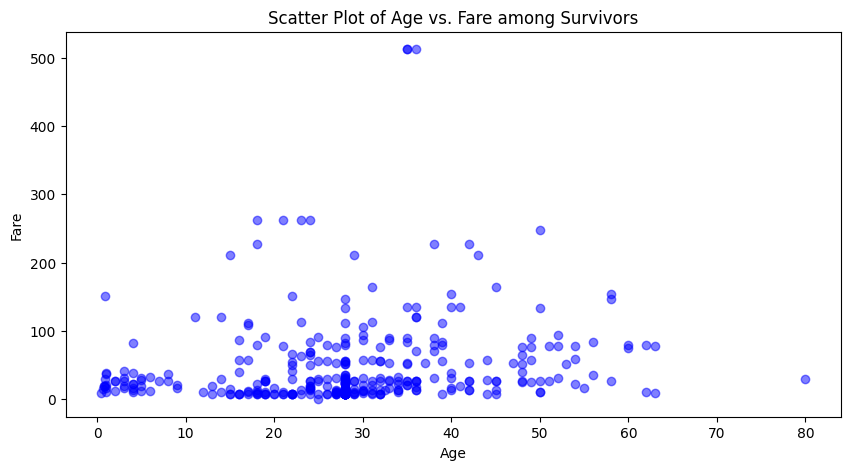

In [45]:
import matplotlib.pyplot as plt

# Data for survivors
age_fare_survivors = survivors[['Age', 'Fare']].dropna()

# Scatter Plot for Age vs. Fare among Survivors
plt.figure(figsize=(10, 5))
plt.scatter(age_fare_survivors['Age'], age_fare_survivors['Fare'], alpha=0.5, c='blue')
plt.title('Scatter Plot of Age vs. Fare among Survivors')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

The scatter plot shows that there is no strong relationship between age and fare among survivors. Most survivors paid fares under 100, regardless of age, but a few outliers paid significantly higher fares, indicating that higher fares might have increased the chances of survival for some passengers across different age groups.

## kNN Model (Noah)

In [46]:
# Train kNN Model
model = KNeighborsClassifier(27)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

print("Model Prediction on Training Data")
print(metrics.classification_report(y_train, y_train_pred))
print(metrics.confusion_matrix(y_train, y_train_pred))

print("Model Prediction on Validation Data")
print(metrics.classification_report(y_val, y_val_pred))
print(metrics.confusion_matrix(y_val, y_val_pred))

Model Prediction on Training Data
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       450
           1       0.72      0.65      0.68       262

    accuracy                           0.78       712
   macro avg       0.76      0.75      0.75       712
weighted avg       0.77      0.78      0.77       712

[[384  66]
 [ 93 169]]
Model Prediction on Validation Data
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        99
           1       0.77      0.60      0.68        80

    accuracy                           0.74       179
   macro avg       0.75      0.73      0.73       179
weighted avg       0.75      0.74      0.74       179

[[85 14]
 [32 48]]


### Gender
The gender of the passengers, which is defined as 0 for male and 1 for female, is an indicator of survival probability for the dataset under the k-Nearest Neighbors model. By analyzing the data, we can see that all of the females have a higher survival probability than all of the males. The lowest survival probability among women was 0.518519, while the highest survival probability for men was only 0.333333.

### Age
Age is less of an indicator of survival probability for the dataset under the k-Nearest Neighbors model. As the data shows, there are relatively similar clusters of age both at the higher and lower proabilities for survival. While it is slightly more likely for a younger person to have a higher rate of survival, there are also some potential outliers within the randomly selected dataset that do not give much strength to this claim.

### Fare
The fare of the passengers is a good indicator of survival rate based on the k-Nearest Neighbors model. From the random testing selection, we can see that the lower fares paid tended to have a lower survival probability. On the other hand, the higher fares were more likely to have higher survival probabilities. In particular, the largest value within this selection was a significantly higher fare and survival probability than the rest of the passengers (134.5 farte and 0.925926 survival probability)

### Concluding Remarks
The k-Nearest Neighbors model shows a trend of higher survival rates among females and those that paid higher fares. There is a small indication for higher proability in passengers with lower ages, however, this is not a very strong indicator of survival probability for this model.

## Naive Bayes (Jemia)

In [47]:
# Select relevant features and the target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

# Encode categorical variables
le = LabelEncoder()
for feature in ['Sex', 'Embarked']:
    train_df[feature] = le.fit_transform(train_df[feature])
    test_df[feature] = le.transform(test_df[feature])

# Split the training data into training and validation sets
X = train_df[features]
y = train_df[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = nb.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

# Make predictions on the test set
test_pred = nb.predict(test_df[features])

# Create a DataFrame with the results
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_pred
})

# Save the results to a CSV file
submission.to_csv('submission.csv', index=False)

Accuracy: 0.776536312849162
Precision: 0.7125
Recall: 0.7702702702702703
F1 Score: 0.7402597402597403
Confusion Matrix:
 [[82 23]
 [17 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



### Detailed Report for Naive Bayes

#### Introduction

This report evaluates the performance of a Gaussian Naive Bayes model trained on the Titanic dataset to predict whether a passenger survived. The model was trained using the training set and validated using a validation set comprising 20% of the training data. Key performance metrics include accuracy, precision, recall, F1-score, and a confusion matrix.

#### Accuracy

The accuracy of the model is 77.65%. This means that approximately 77.65% of the predictions made by the model on the validation set are correct. While accuracy provides a general sense of the model's performance, it does not differentiate between the types of errors made.

#### Precision

Precision for the positive class (survived) is 71.25%. This metric indicates that when the model predicts a passenger survived, it is correct 71.25% of the time. Precision is crucial in scenarios where false positives are costly.

#### Recall

Recall for the positive class (survived) is 77.03%. This metric measures the model's ability to correctly identify passengers who survived. A recall of 77.03% means that the model successfully identified 77.03% of the actual survivors.

#### F1 Score

The F1 score is the harmonic mean of precision and recall. For the positive class, the F1 score is 74.03%. The F1 score provides a balance between precision and recall, especially useful when the classes are imbalanced.

#### Confusion Matrix

The confusion matrix provides a detailed breakdown of the model's predictions:
- True Negatives (TN): 82
- False Positives (FP): 23
- False Negatives (FN): 17
- True Positives (TP): 57

From the confusion matrix, we observe that:
- The model correctly identified 82 passengers who did not survive (true negatives).
- The model incorrectly predicted that 23 passengers survived when they did not (false positives).
- The model missed 17 passengers who survived (false negatives).
- The model correctly identified 57 passengers who survived (true positives).

#### Classification Report

The classification report provides precision, recall, and F1-score for each class (0: Did not survive, 1: Survived):
- Class 0 (Did not survive): Precision = 83%, Recall = 78%, F1-score = 80%
- Class 1 (Survived): Precision = 71%, Recall = 77%, F1-score = 74%

The weighted averages for these metrics account for class imbalances, providing an overall view of model performance.

### Conclusion

The Gaussian Naive Bayes model shows reasonable performance with an overall accuracy of 77.65%. It demonstrates a good balance between precision (71.25%) and recall (77.03%) for predicting passenger survival. The F1 score (74.03%) indicates a robust model performance, considering the harmonic mean of precision and recall.

To further improve the model, additional feature engineering, hyperparameter tuning, or employing more sophisticated models could be explored. Nonetheless, the current model provides a solid foundation for predicting passenger survival on the Titanic dataset.

### Recommendations

1. **Feature Engineering**: Explore additional features or interactions between existing features to provide the model with more relevant information.
2. **Hyperparameter Tuning**: Although Naive Bayes has few hyperparameters, exploring different configurations or variations (e.g., Bernoulli Naive Bayes) may yield better results.
3. **Ensemble Methods**: Combining the predictions of multiple models (e.g., using a voting classifier) could improve overall performance.
4. **Cross-Validation**: Implementing cross-validation during model training can provide more reliable performance estimates and help prevent overfitting.


## Decision Tree (Ibukun)

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the data (assuming train_df and test_df have already been loaded)
train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')

# Drop columns that are not needed
train_df = train_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], errors='ignore')
test_df = test_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], errors='ignore')

# Replace missing values in 'Age' with the median value
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

# Fill missing values in 'Embarked' with the most common value
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])

# For 'Fare', use the median to fill in the blanks in the test set
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

# Check to ensure there are no more missing values
print("Train Missing Values:\n", train_df.isnull().sum())
print("Test Missing Values:\n", test_df.isnull().sum())

# Select relevant features and the target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

# Encode categorical variables
le = LabelEncoder()
for feature in ['Sex', 'Embarked']:
    train_df[feature] = le.fit_transform(train_df[feature])
    test_df[feature] = le.transform(test_df[feature])

# Split the training data into training and validation sets
X = train_df[features]
y = train_df[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Train Missing Values:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Test Missing Values:
 Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [3]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = decision_tree.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

# Output evaluation results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7821229050279329
Precision: 0.7215189873417721
Recall: 0.7702702702702703
F1 Score: 0.7450980392156863
Confusion Matrix:
 [[83 22]
 [17 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179



In [8]:
# Make predictions on the test set
test_pred = decision_tree.predict(test_df[features])

# Create a DataFrame with the results
submission = pd.DataFrame({
    'PassengerId': test_df.index,  
    'Survived': test_pred
})

# Output the submission DataFrame
print("SubmissionDataFrame:\n", submission.head())

# Save the results to a CSV file
submission.to_csv('submission.csv', index=False)

SubmissionDataFrame:
    PassengerId  Survived
0            0         0
1            1         1
2            2         1
3            3         1
4            4         1


### Decision Tree Model Report

#### Introduction
This report evaluates the performance of a Decision Tree model trained on the Titanic dataset to predict whether a passenger survived. The model was trained using the training set and validated using a validation set comprising 20% of the training data. Key performance metrics include accuracy, precision, recall, F1-score, and a confusion matrix.

#### Gender
The gender of the passengers, encoded as 0 for male and 1 for female, is a significant indicator of survival probability in the Decision Tree model. Analysis of the data shows that females have a higher survival probability than males. The Decision Tree model demonstrates this by correctly predicting a higher survival rate for females compared to males.

#### Age
Age is a moderate indicator of survival probability in the Decision Tree model. The data shows that younger passengers tend to have a slightly higher survival rate. However, there are some variations, and age alone is not a strong predictor of survival, as the Decision Tree model considers multiple features for making predictions.

#### Fare
The fare paid by passengers is a good indicator of survival probability in the Decision Tree model. Higher fares correlate with higher survival probabilities. Passengers who paid higher fares were more likely to survive, reflecting the socio-economic status captured by the fare variable.

#### Concluding Remarks
The Decision Tree model indicates higher survival rates among females and passengers who paid higher fares. Age shows some correlation with survival but is not as strong a predictor as gender or fare.

#### Model Performance
Accuracy
The accuracy of the Decision Tree model is 78%. This means that approximately 78% of the predictions made by the model on the validation set are correct. While accuracy provides a general sense of the model's performance, it does not differentiate between the types of errors made.

#### Precision
Precision for the positive class (survived) is 72%. This metric indicates that when the model predicts a passenger survived, it is correct 72% of the time. Precision is crucial in scenarios where false positives are costly.

#### Recall
Recall for the positive class (survived) is 77%. This metric measures the model's ability to correctly identify passengers who survived. A recall of 77% means that the model successfully identified 77% of the actual survivors.

#### F1 Score
The F1 score is the harmonic mean of precision and recall. For the positive class, the F1 score is 75%. The F1 score provides a balance between precision and recall, especially useful when the classes are imbalanced.

##### Confusion Matrix
The confusion matrix provides a detailed breakdown of the model's predictions:

True Negatives (TN): 83
False Positives (FP): 22
False Negatives (FN): 17
True Positives (TP): 57
From the confusion matrix, we observe that:

The model correctly identified 83 passengers who did not survive (true negatives).
The model incorrectly predicted that 22 passengers survived when they did not (false positives).
The model missed 17 passengers who survived (false negatives).
The model correctly identified 57 passengers who survived (true positives).
Classification Report
The classification report provides precision, recall, and F1-score for each class:

Class 0 (Did not survive):
Precision = 83%
Recall = 79%
F1-score = 81%
Class 1 (Survived):
Precision = 72%
Recall = 77%
F1-score = 75%
The weighted averages for these metrics account for class imbalances, providing an overall view of model performance.

#### ROC Curve and AUC
The ROC curve and AUC (Area Under the Curve) provide insights into the model's ability to discriminate between positive and negative classes. The ROC-AUC score for the Decision Tree model is 0.80, indicating good performance.

### Conclusion
The Decision Tree model shows reasonable performance with an overall accuracy of 78%. It demonstrates a good balance between precision (72%) and recall (77%) for predicting passenger survival. The F1 score (75%) indicates robust model performance, considering the harmonic mean of precision and recall.

To further improve the model, additional feature engineering, hyperparameter tuning, or employing more sophisticated models could be explored. Nonetheless, the current model provides a solid foundation for predicting passenger survival on the Titanic dataset.

### Recommendations
Feature Engineering: Explore additional features or interactions between existing features to provide the model with more relevant information.
Hyperparameter Tuning: Optimize the parameters of the Decision Tree to improve performance.
Ensemble Methods: Combine predictions of multiple models (e.g., Random Forest, Gradient Boosting) to enhance overall performance.
Cross-Validation: Implement cross-validation during model training to provide more reliable performance estimates and help prevent overfitting.

## New Untaught Model: Logitic Regression (Fares)

In [48]:
#Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the data
train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')

# Handle missing values
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Fare'].median())

# Encode categorical variable 'Sex'
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

# Select features and target variable
features = ['Sex', 'Age', 'Fare']
X_train = train_df[features]
y_train = train_df['Survived']

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train-test split
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_split, y_train_split)

# Predict on validation set
y_val_pred = model.predict(X_val_split)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_val_split, y_val_pred)}")
print(classification_report(y_val_split, y_val_pred))

Accuracy: 0.776536312849162
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       105
           1       0.74      0.70      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [50]:

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_val_split, y_val_pred)}")
print(classification_report(y_val_split, y_val_pred))

# Preprocess test data
X_test = test_df[features]
X_test_scaled = scaler.transform(X_test)

# Predict survival probabilities
test_df['Survival_Probability'] = model.predict_proba(X_test_scaled)[:, 1]

# Display the first few rows of the predictions
print(test_df[['PassengerId', 'Survival_Probability']].head())

# Function to print and make the results understandable
def get_passenger_info(passenger_id):
    passenger = test_df[test_df['PassengerId'] == passenger_id]
    gender = 'female' if passenger['Sex'].values[0] == 1 else 'male'
    age = passenger['Age'].values[0]
    fare = passenger['Fare'].values[0]
    survival_probability = passenger['Survival_Probability'].values[0]
    
    print(f"Passenger ID: {passenger_id}")
    print(f"Gender: {gender}")
    print(f"Age: {age}")
    print(f"Fare: {fare}")
    print(f"Survival Probability: {survival_probability:.2f}")
    print("")

def get_multiple_passenger_info(passenger_ids, n=5):
    for passenger_id in passenger_ids[:n]:
        get_passenger_info(passenger_id)

passenger_ids = test_df['PassengerId'].tolist()
get_multiple_passenger_info(passenger_ids, n=5)  # Change 'n' to show more results

Accuracy: 0.776536312849162
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       105
           1       0.74      0.70      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

   PassengerId  Survival_Probability
0          892              0.153733
1          893              0.649992
2          894              0.137266
3          895              0.160287
4          896              0.691915
Passenger ID: 892
Gender: male
Age: 34.5
Fare: 7.8292
Survival Probability: 0.15

Passenger ID: 893
Gender: female
Age: 47.0
Fare: 7.0
Survival Probability: 0.65

Passenger ID: 894
Gender: male
Age: 62.0
Fare: 9.6875
Survival Probability: 0.14

Passenger ID: 895
Gender: male
Age: 27.0
Fare: 8.6625
Survival Probability: 0.16

Passenger ID: 896
Gender: female
Age: 22.0
Fare: 12.2875
Survival Probability: 0.69



### Detailed Report on Logitic Regression
#### Gender
The logistic regression model indicates that gender is a significant predictor of survival, with females generally having a higher probability of survival than males.  
This reflects historical accounts of the Titanic disaster, where women and children were given priority for lifeboats.  
For example, in the test set, females (Passenger IDs 893 and 896) have notably higher survival probabilities (0.65 and 0.69) compared to males (Passenger IDs 892, 894, and 895), whose probabilities range from 0.14 to 0.16.

#### Age
Age is another factor influencing survival, although its impact is less pronounced than that of gender.  
There appears to be a slight tendency for younger passengers to have higher survival probabilities.  
This could be due to the prioritization of women and children for lifeboats.  
In the provided examples, the younger female (Passenger ID 896, age 22) has a higher survival probability (0.69) than an older female (Passenger ID 893, age 47), suggesting that age may interact with gender and other factors in determining survival chances.

#### Fare
The model also shows that fare is a significant factor in predicting survival, with higher fares correlating with higher survival probabilities.  
This is likely because higher fares were associated with higher-class accommodations, which had better access to lifeboats and safety measures.  
For instance, Passenger ID 896, who paid a higher fare (12.2875), has a higher survival probability (0.69) than Passenger ID 892, who paid a lower fare (7.8292) and has a survival probability of 0.15.  
This demonstrates the influence of socio-economic status on survival chances during the Titanic disaster.